In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires (1).csv to forestfires (1).csv


In [3]:
fores_data = pd.read_csv('forestfires (1).csv')
fores_data


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
fores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
fores_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaler = StandardScaler()

In [7]:
fores_data['month'] = le.fit_transform(fores_data['month'])
fores_data['day'] = le.fit_transform(fores_data['day'])
fores_data['size_category'] = le.fit_transform(fores_data['size_category'])
X= fores_data.drop('size_category',axis=1)
Y=fores_data['size_category']
X_scaled = scaler.fit_transform(X)

In [8]:
model = Sequential()
model.add(Dense(12,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 2s 11ms/step - loss: 0.6041 - accuracy: 0.7572 - val_loss: 0.6892 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5629 - accuracy: 0.7572 - val_loss: 0.6333 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5480 - accuracy: 0.7572 - val_loss: 0.6258 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.7659 - val_loss: 0.5653 - val_accuracy: 0.7076
Epoch 5/150
35/35 [==============================] - 0s 5ms/step - loss: 0.4667 - accuracy: 0.7890 - val_loss: 0.5008 - val_accuracy: 0.7427
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4134 - accuracy: 0.8092 - val_loss: 0.4918 - val_accuracy: 0.7661
Epoch 7/150
35/35 [==============================] - 0s 5ms/step - loss: 0.3749 - accuracy: 0.8468 - val_loss: 0.4010 - val_accuracy: 0.8070
Epoch 8/150


In [9]:
score = model.evaluate(X,Y)

17/17 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9807


In [10]:
model.metrics_names[1], score[1]*100

('accuracy', 98.06576371192932)

In [11]:
h=model.fit(x=X, y=Y, verbose=1,batch_size=50,epochs=500,shuffle='true')

Epoch 1/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9807
Epoch 2/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9826
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9884
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9903
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9903
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9903
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9903
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9942
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9884
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9903
Epoch 11/

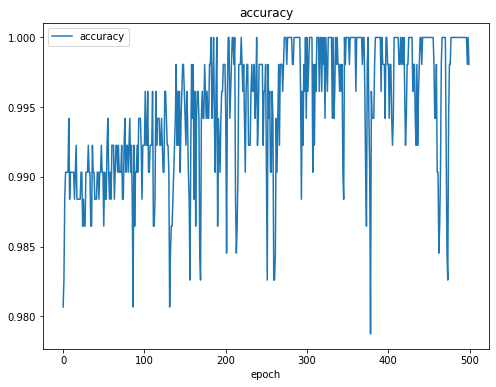

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy']);

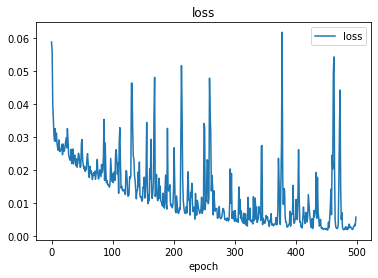

In [13]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss']);